In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
#LDP Data Analysis 

df = pd.read_csv("clean_LDP_dataset.csv")
df_1 = pd.read_csv("clean_LDP_dataset.csv")

df_2 = pd.read_csv("clean_LOI_EOP_DATA.csv")
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

import spacy
from spacy import displacy
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') #sm does not use vectors
                                   #but md does use vectors

In [2]:
m = df["Q11_3"]
m = m.dropna(axis=0)
mean_q11 = m.mean()

n = df["Q12_3"]
n = n.dropna(axis=0)
mean_q12 = n.mean()

p = df["Q13_3"]
p = p.dropna(axis=0)
mean_q13 = p.mean()

In [3]:
print("Field Trainer 1 mean -"+str(mean_q11))
print("Field Trainer 2 mean -"+str(mean_q12))
print("Field Trainer 3 mean -"+str(mean_q13))

Field Trainer 1 mean -4.774238468233246
Field Trainer 2 mean -4.791185729275971
Field Trainer 3 mean -4.767509727626459


In [4]:
df=pd.DataFrame(m)
df["Q12_3"] = n

In [5]:
# Perform the ANOVA

stats.f_oneway(m,n,p) 
#one-way anova test for LDP trainer data - Was an effective facilitator
#so we can conclude that the means between the 3 trainers are similar, have statistical significance

F_onewayResult(statistic=2.2232628081286046, pvalue=0.10829816267233865)

In [6]:
n = df_1["OrgName"].value_counts()
n = pd.DataFrame(n)

m = df_2["OrgName"].value_counts()
m = pd.DataFrame(m)
m.head()

,OrgName
Center for Creative Leadership,29
Delta Air Lines,17
Matthews International,15
Daimler Trucks North America,14
Panasonic,14


In [7]:
n.head()

,OrgName
Center for Creative Leadership,53
US GAO,46
Illumina,44
Defense Logistics Agency,40
Panasonic,35


In [8]:
columns_2_clean = ["Q9_1","Q9_2","Q11_2","Q11_3","Q11_4","Q12_2","Q12_3","Q12_4","Q13_2","Q13_3","Q13_4"]

In [9]:
df_1[columns_2_clean].head()

,Q9_1,Q9_2,Q11_2,Q11_3,Q11_4,Q12_2,Q12_3,Q12_4,Q13_2,Q13_3,Q13_4
0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,3.0,NaN,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN


In [10]:
df_1.head()

,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Trainer03RC,Trainer03FL,Trainer04BK,Trainer04RC,Trainer04FL,Trainer05BK,Trainer05RC,Trainer05FL,Program Code,Q15 - Topics
0,2,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,336,True,6/19/17 19:54,R_30dvwf8u53maBHD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,3,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,383,True,6/19/17 19:54,R_2XnsYU4IUfTwIZ7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,4,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,379,True,6/19/17 19:54,R_1plIhVnhtEvVta3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1/30/15 11:21,1/30/15 11:28,IP Address,208.0.118.3,NaN,462,True,6/19/17 19:54,R_3hxzKGqy7BHj5So,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,6,1/30/15 11:21,1/30/15 11:29,IP Address,208.0.118.3,NaN,499,True,6/19/17 19:54,R_2BksDDpAJJGaBWy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [11]:
#JoinedTables['Notes'].str.contains('exercise').astype(int)
df_1["2015 Cols = 1"] = df_1["StartDate"].str.contains("15").astype(int)

In [12]:
data_2015 = df_1[df_1["2015 Cols = 1"] == 1]


In [13]:
#len(data_2015)

In [14]:
mean_overall_sat15 = data_2015["Q2_1"].mean()

In [15]:
df_1["2016 Cols = 1"] = df_1["StartDate"].str.contains("16").astype(int)
data_2016 = df_1[df_1["2016 Cols = 1"] == 1]
#len(data_2016)

In [16]:
mean_overall_sat16 = data_2016["Q2_1"].mean()

In [17]:
df_1["2017 Cols = 1"] = df_1["StartDate"].str.contains("17").astype(int)
data_2017 = df_1[df_1["2017 Cols = 1"] == 1]
#len(data_2017)

In [18]:
mean_overall_sat17 = data_2017["Q2_1"].mean()

In [19]:
df_1["2018 Cols = 1"] = df_1["StartDate"].str.contains("18").astype(int)
data_2018 = df_1[df_1["2018 Cols = 1"] == 1]
#len(data_2018)

In [20]:
mean_overall_sat18 = data_2018["Q2_1"].mean()

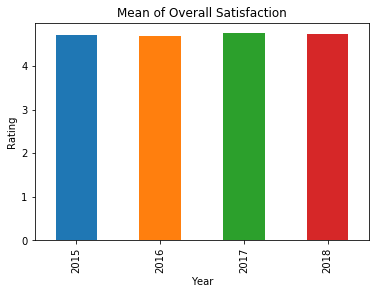

In [21]:
mean_data = {"Mean Overall Satisfaction Rating": [mean_overall_sat15,mean_overall_sat16,mean_overall_sat17,mean_overall_sat18]}
mean_df = pd.DataFrame(mean_data)
mean_df = mean_df.rename(index={0: '2015',1:'2016',2:'2017',3:'2018'})
mean_df
ax = mean_df["Mean Overall Satisfaction Rating"].plot(kind="bar") 
plt.title("Mean of Overall Satisfaction")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.savefig("./Plots_Folder/Yearly_Mean_Overall_Satisfaction.png")
